**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
!pip install geopy
!pip install geocoder
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.point import Point

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 3.7 MB/s 


# **Loading and Learning dataset**

In [3]:
!unzip archive.zip -d "/content/"

Archive:  archive.zip
replace /content/latestdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/latestdata.csv  


In [4]:
df=pd.read_csv("/content/latestdata.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


In [5]:
df.shape

(2676311, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

In [7]:
print(f"{df.isnull().sum()*100/len(df)}")

ID                           0.000000
age                         78.402435
sex                         78.322512
city                        36.530919
province                    16.913729
country                      0.004297
latitude                     0.002616
longitude                    0.002616
geo_resolution               0.002616
date_onset_symptoms         90.225389
date_admission_hospital     95.657792
date_confirmation            4.053677
symptoms                    99.923327
lives_in_Wuhan              99.837911
travel_history_dates        99.902440
travel_history_location     99.655421
reported_market_exposure    99.960057
additional_information      98.286634
chronic_disease_binary       0.000000
chronic_disease             99.991967
source                      21.184533
sequence_available          99.999552
outcome                     88.514713
date_death_or_discharge     99.882375
notes_for_discussion        99.976086
location                    99.500208
admin3      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,2676241.0,37.614219,20.487454,-54.808030,28.99523,44.185210,51.76213,70.0718
longitude,2676241.0,10.221762,48.276907,-159.727596,-2.95214,9.172073,35.17355,174.7400
admin_id,2676241.0,6431.125818,5196.760823,2.000000,577.00000,6345.000000,11391.00000,16209.0000


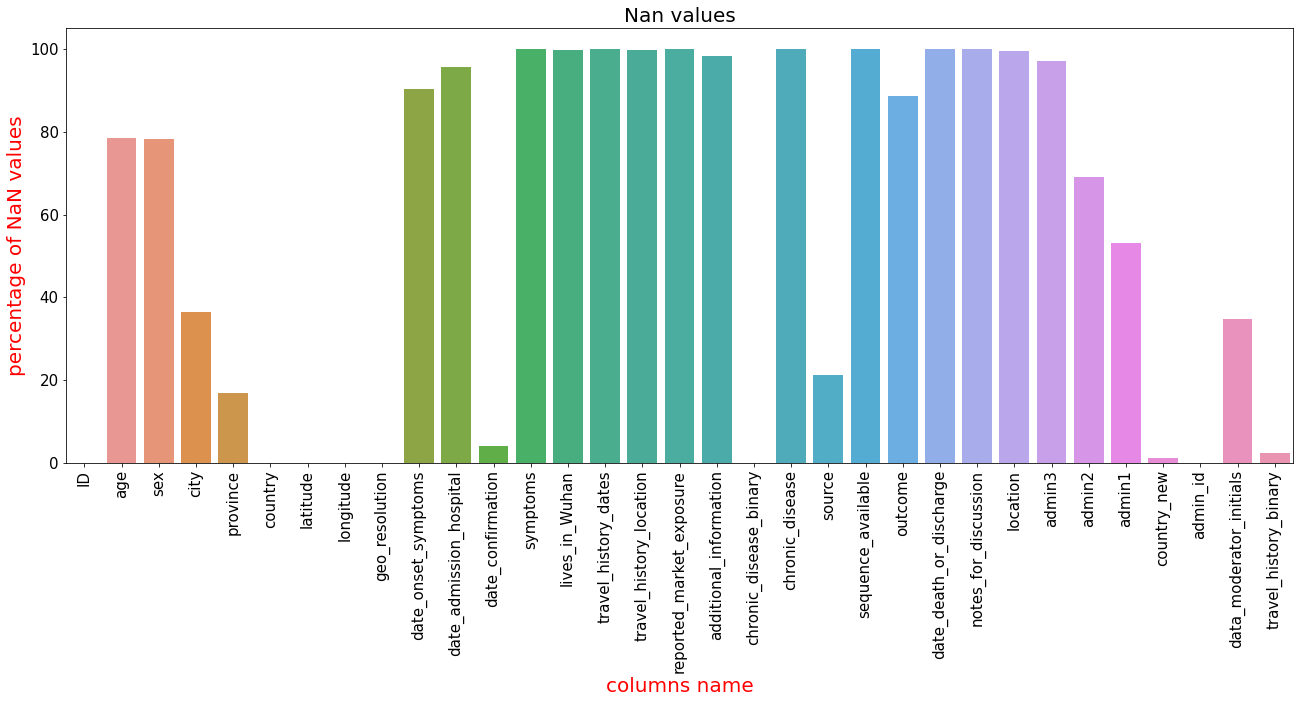

In [9]:
plt.figure(figsize=(22,8))
sns.barplot(x=df.columns, y=df.isnull().sum()*100/len(df))
plt.xlabel('columns name', fontsize=20, color='red')
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('percentage of NaN values', fontsize=20, color='red')
plt.yticks(fontsize=15)
plt.title("Nan values", fontsize=20)
plt.show()

In [10]:
for column in df.columns[:]:
    print(f"{df[column].name}:{df[column].unique()}") 

ID:['000-1-1' '000-1-10' '000-1-100' ... '010-99997' '010-99998' '010-99999']
age:[nan '78' '61' '66' '27' '17' '51' '68' '26' '30' '53' '35' '28' '58' '33'
 '50' '45' '24' '88' '29' '21' '52' '60' '56' '79' '40-49' '82' '25' '40'
 '20-29' '40-89' '60-69' '80-89' '50-59' '13-19' '30-39' '43' '7' '44'
 '69' '16' '47' '8' '10' '55' '38' '42' '34' '62' '39' '71' '64' '36' '31'
 '1' '48' '54' '70-79' '60-60' '65' '46' '57' '32' '37' '80-80' '73' '67'
 '0-6' '0-10' '22' '41' '10-19' '70' '96' '20' '63' '19' '1.75' '75'
 '18-65' '0.6666666667' '12' '49' '80' '77' '18' '72' '4' '15' '95' '0-18'
 '23' '65-99' '81' '90-99' '50-69' '85' '91' '87' '14' '19-65' '70-70'
 '60-70' '76' '94' '38-68' '0.5' '0.25' '9' '16-17' '5-59' '40-50' '13'
 '60-' '59' '12-19' '74' '18-50' '18-49' '41-60' '61-80' '18-60' '60-99'
 '40-69' '30-69' '40-45' '0-9' '11' '54-56' '0-19' '5' '20-30' '50-99'
 '18-20' '17-66' '84' '2' '20-39' '86' '65-' '18-99' '34-66' '55-74' '75-'
 '35-54' '55-' '18-' '83' '74-76' '27-29' '

In [11]:
df.duplicated().sum()

0

**Column 'Age'**

In [12]:
df.age.unique()

array([nan, '78', '61', '66', '27', '17', '51', '68', '26', '30', '53',
       '35', '28', '58', '33', '50', '45', '24', '88', '29', '21', '52',
       '60', '56', '79', '40-49', '82', '25', '40', '20-29', '40-89',
       '60-69', '80-89', '50-59', '13-19', '30-39', '43', '7', '44', '69',
       '16', '47', '8', '10', '55', '38', '42', '34', '62', '39', '71',
       '64', '36', '31', '1', '48', '54', '70-79', '60-60', '65', '46',
       '57', '32', '37', '80-80', '73', '67', '0-6', '0-10', '22', '41',
       '10-19', '70', '96', '20', '63', '19', '1.75', '75', '18-65',
       '0.6666666667', '12', '49', '80', '77', '18', '72', '4', '15',
       '95', '0-18', '23', '65-99', '81', '90-99', '50-69', '85', '91',
       '87', '14', '19-65', '70-70', '60-70', '76', '94', '38-68', '0.5',
       '0.25', '9', '16-17', '5-59', '40-50', '13', '60-', '59', '12-19',
       '74', '18-50', '18-49', '41-60', '61-80', '18-60', '60-99',
       '40-69', '30-69', '40-45', '0-9', '11', '54-56', '0-19', '5'

In [13]:
df1=df.age.str.split(pat=None, expand = True)

In [14]:
df1.rename(columns={0:'a', 1:'b', 2:'c'}, inplace=True)

In [15]:
print(df1.a.unique())
print(df1.b.unique())
print(df1.c.unique())

[nan '78' '61' '66' '27' '17' '51' '68' '26' '30' '53' '35' '28' '58' '33'
 '50' '45' '24' '88' '29' '21' '52' '60' '56' '79' '40-49' '82' '25' '40'
 '20-29' '40-89' '60-69' '80-89' '50-59' '13-19' '30-39' '43' '7' '44'
 '69' '16' '47' '8' '10' '55' '38' '42' '34' '62' '39' '71' '64' '36' '31'
 '1' '48' '54' '70-79' '60-60' '65' '46' '57' '32' '37' '80-80' '73' '67'
 '0-6' '0-10' '22' '41' '10-19' '70' '96' '20' '63' '19' '1.75' '75'
 '18-65' '0.6666666667' '12' '49' '80' '77' '18' '72' '4' '15' '95' '0-18'
 '23' '65-99' '81' '90-99' '50-69' '85' '91' '87' '14' '19-65' '70-70'
 '60-70' '76' '94' '38-68' '0.5' '0.25' '9' '16-17' '5-59' '40-50' '13'
 '60-' '59' '12-19' '74' '18-50' '18-49' '41-60' '61-80' '18-60' '60-99'
 '40-69' '30-69' '40-45' '0-9' '11' '54-56' '0-19' '5' '20-30' '50-99'
 '18-20' '17-66' '84' '2' '20-39' '86' '65-' '18-99' '34-66' '55-74' '75-'
 '35-54' '55-' '18-' '83' '74-76' '27-29' '27-40' '50-60' '30-70' '20-70'
 '20-69' '22-80' '19-77' '13-69' '30-40' '70-100' '

In [16]:
df.age=df1.a

In [17]:
df2=df.age.str.split(pat='-', expand = True)

In [18]:
df2.rename(columns={0:'a', 1:'b'}, inplace=True)

In [19]:
print(df2.a.unique())
print(df2.b.unique())

[nan '78' '61' '66' '27' '17' '51' '68' '26' '30' '53' '35' '28' '58' '33'
 '50' '45' '24' '88' '29' '21' '52' '60' '56' '79' '40' '82' '25' '20'
 '80' '13' '43' '7' '44' '69' '16' '47' '8' '10' '55' '38' '42' '34' '62'
 '39' '71' '64' '36' '31' '1' '48' '54' '70' '65' '46' '57' '32' '37' '73'
 '67' '0' '22' '41' '96' '63' '19' '1.75' '75' '18' '0.6666666667' '12'
 '49' '77' '72' '4' '15' '95' '23' '81' '90' '85' '91' '87' '14' '76' '94'
 '0.5' '0.25' '9' '5' '59' '74' '11' '84' '2' '86' '83' '89' '3' '93' '6'
 '92' '97' '0.58333' '0.08333' '105' '0.75' '99' '101' '98' '1.5' '0.4'
 '0.3' '2.5' '0.2' '0.7' '29.6' '0.1' '3.5' '0.9' '54.9' '0.6' '90+' '102'
 '100' '121' '80+' '00' '05' '104' '85+']
[nan None '49' '29' '89' '69' '59' '19' '39' '79' '60' '80' '6' '10' '65'
 '18' '99' '70' '68' '17' '50' '' '45' '9' '56' '30' '20' '66' '74' '54'
 '76' '40' '77' '100' '72' '35' '78' '82' '88' '75' '61' '64' '87' '57'
 '71' '44' '58' '42' '84' '12' '41' '38' '23' '48' '24' '27' '1' '14' '34'
 

In [20]:
df.age=df2.a

In [21]:
df3=df.age.str.split(pat='+', expand = True)

In [22]:
df3.rename(columns={0:'a', 1:'b'}, inplace=True)

In [23]:
print(df3.a.unique())
print(df3.b.unique())

[nan '78' '61' '66' '27' '17' '51' '68' '26' '30' '53' '35' '28' '58' '33'
 '50' '45' '24' '88' '29' '21' '52' '60' '56' '79' '40' '82' '25' '20'
 '80' '13' '43' '7' '44' '69' '16' '47' '8' '10' '55' '38' '42' '34' '62'
 '39' '71' '64' '36' '31' '1' '48' '54' '70' '65' '46' '57' '32' '37' '73'
 '67' '0' '22' '41' '96' '63' '19' '1.75' '75' '18' '0.6666666667' '12'
 '49' '77' '72' '4' '15' '95' '23' '81' '90' '85' '91' '87' '14' '76' '94'
 '0.5' '0.25' '9' '5' '59' '74' '11' '84' '2' '86' '83' '89' '3' '93' '6'
 '92' '97' '0.58333' '0.08333' '105' '0.75' '99' '101' '98' '1.5' '0.4'
 '0.3' '2.5' '0.2' '0.7' '29.6' '0.1' '3.5' '0.9' '54.9' '0.6' '102' '100'
 '121' '00' '05' '104']
[nan None '']


In [24]:
df.age=df3.a

In [25]:
df.age.unique()

array([nan, '78', '61', '66', '27', '17', '51', '68', '26', '30', '53',
       '35', '28', '58', '33', '50', '45', '24', '88', '29', '21', '52',
       '60', '56', '79', '40', '82', '25', '20', '80', '13', '43', '7',
       '44', '69', '16', '47', '8', '10', '55', '38', '42', '34', '62',
       '39', '71', '64', '36', '31', '1', '48', '54', '70', '65', '46',
       '57', '32', '37', '73', '67', '0', '22', '41', '96', '63', '19',
       '1.75', '75', '18', '0.6666666667', '12', '49', '77', '72', '4',
       '15', '95', '23', '81', '90', '85', '91', '87', '14', '76', '94',
       '0.5', '0.25', '9', '5', '59', '74', '11', '84', '2', '86', '83',
       '89', '3', '93', '6', '92', '97', '0.58333', '0.08333', '105',
       '0.75', '99', '101', '98', '1.5', '0.4', '0.3', '2.5', '0.2',
       '0.7', '29.6', '0.1', '3.5', '0.9', '54.9', '0.6', '102', '100',
       '121', '00', '05', '104'], dtype=object)

In [26]:
df['age']=df['age'].astype('float')

In [27]:
df['age']=df['age'].round().astype('Int64')

**Columns 'City' and 'Province'**

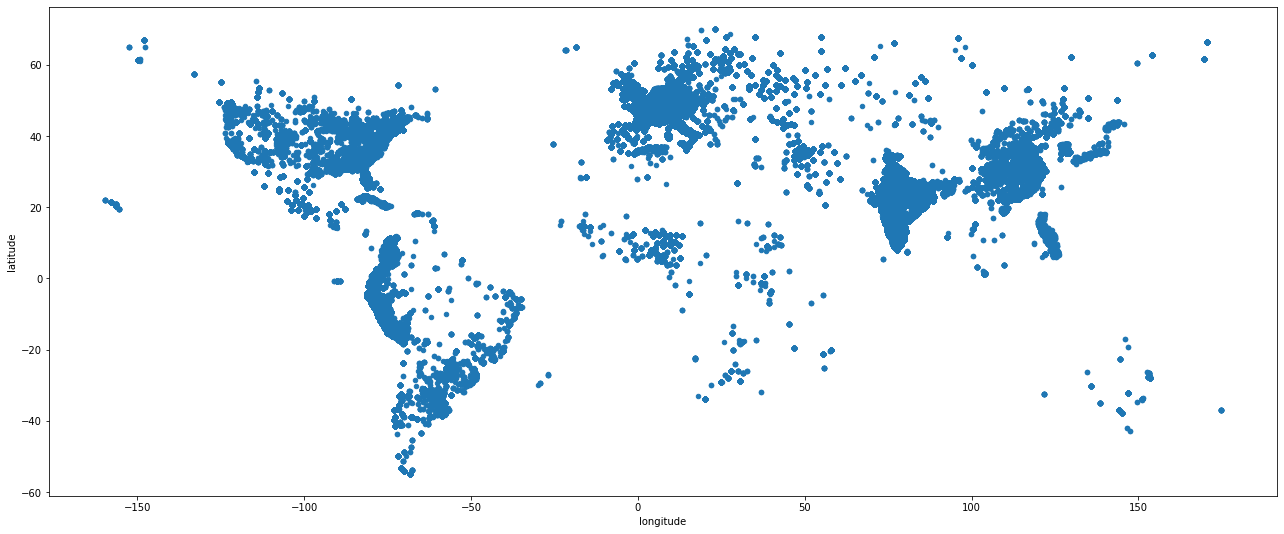

In [28]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(22,9))
plt.show()

We have two way to filling nan values of city, province, county. First, we can fill using by longitude and latitude. Second way, we can do it using "ffill bfill" methods. I can't do it by the first way beacause of my laptop technique options.

In [29]:
import geocoder

def geo_rev_city(x):
    g = geocoder.osm([x.latitude, x.longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return np.NaN

def geo_rev_province(x):
    g = geocoder.osm([x.latitude, x.longitude], method='reverse').json
    if g:
        return g.get('state')
    else:
        return np.NaN

def geo_rev_country(x):
    g = geocoder.osm([x.latitude, x.longitude], method='reverse').json
    if g:
        return g.get('country')
    else:
        return np.NaN


# df['city']=df[['latitude', 'longitude']].apply(geo_rev_city, axis=1)
# df['state']=df[['latitude', 'longitude']].apply(geo_rev_province, axis=1)
# df['country']=df[['latitude', 'longitude']].apply(geo_rev_country, axis=1)

We can fill nan values with the methods of "ffill, bfill, median and ect.", or delete the nan

In [30]:
df.fillna(method="ffill")

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,<NA>,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,Vo Euganeo,Veneto,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Singapore,200.0,NaN,NaN
3,000-1-1000,61,female,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,17.02.2020,NaN,Vo' Euganeo,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,61,female,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,17.02.2020,NaN,Vo' Euganeo,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,35,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,point,18.04.2020,...,23.05.2020,https://www.cbc.ca/news/canada/british-columbi...,New Rochelle,West Berkshire,Lima,Lima,Peru,14429.0,ZW,False
2676307,010-99996,35,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,point,18.04.2020,...,23.05.2020,https://www.cbc.ca/news/canada/british-columbi...,New Rochelle,West Berkshire,Lima,Lima,Peru,14695.0,ZW,False
2676308,010-99997,35,female,Comas,Lima,Peru,-11.932980,-77.040850,point,18.04.2020,...,23.05.2020,https://www.cbc.ca/news/canada/british-columbi...,New Rochelle,West Berkshire,Lima,Lima,Peru,14400.0,ZW,False
2676309,010-99998,35,male,Callao,Callao,Peru,-12.000740,-77.118240,point,18.04.2020,...,23.05.2020,https://www.cbc.ca/news/canada/british-columbi...,New Rochelle,West Berkshire,Lima,Lima,Peru,14516.0,ZW,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       Int64  
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    bool   
 19  chronic_disease           object 
 20  source                  

In [32]:
# encoder=LabelEncoder()

# cols=["sex", "city", "province", "country", "geo_resolution", "date_onset_symptoms", "date_admission_hospital",
#       "date_confirmation", "symptoms", "lives_in_Wuhan", "travel_history_dates", "travel_history_location",
#       "reported_market_exposure", "additional_information", "chronic_disease_binary", "chronic_disease", "source", 
#       "sequence_available", "outcome", "date_death_or_discharge", "notes_for_discussion", "location", "admin3", "admin2",
#       "admin1", "country_new", "data_moderator_initials", "travel_history_binary"]
# df[cols]=df[cols].apply(LabelEncoder().fit_transform)

Removing columns that haven't more 2.5 billion values

In [33]:
df_new=df.dropna(axis=1, thresh=2500000)
df_new.head()

,ID,country,latitude,longitude,geo_resolution,date_confirmation,chronic_disease_binary,country_new,admin_id,travel_history_binary
0,000-1-1,China,22.365019,114.133808,point,14.02.2020,False,China,8029.0,NaN
1,000-1-10,Italy,45.297748,11.658382,point,21.02.2020,False,Italy,8954.0,NaN
2,000-1-100,Singapore,1.353460,103.815100,admin0,14.02.2020,False,Singapore,200.0,NaN
3,000-1-1000,China,34.629310,113.468000,admin2,26.01.2020,False,China,10091.0,NaN
4,000-1-10000,China,27.513560,113.902900,admin2,14.02.2020,False,China,7060.0,NaN


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 10 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ID                      object 
 1   country                 object 
 2   latitude                float64
 3   longitude               float64
 4   geo_resolution          object 
 5   date_confirmation       object 
 6   chronic_disease_binary  bool   
 7   country_new             object 
 8   admin_id                float64
 9   travel_history_binary   object 
dtypes: bool(1), float64(3), object(6)
memory usage: 186.3+ MB


In [36]:
# encoder=LabelEncoder()
# cols=["country", "geo_resolution", "date_confirmation", "chronic_disease_binar", "country_new", "travel_history_binary"]
# df[cols]=df[cols].apply(LabelEncoder().fit_transform)